# Predicting lung cancer disease using Machine Learning

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier


# Load dataset (assuming you have a CSV file)
data = pd.read_csv('D:\College\sem 5\ML project Final Final V-3\data\lung_cancer.csv')

# Assuming the target column is 'LUNG_CANCER'
X = data.drop('LUNG_CANCER', axis=1)
y = data['LUNG_CANCER']

# Identify categorical columns
categorical_cols = [col for col in X.columns if X[col].dtype == 'O']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a preprocessor to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming data is your dataset

# Step 1: Encode the 'GENDER' column if not done already
label_encoder_gender = LabelEncoder()
data['GENDER'] = label_encoder_gender.fit_transform(data['GENDER'])

# Step 2: Define features (X) and target (y)
X = data.drop(columns='LUNG_CANCER')
y = data['LUNG_CANCER']

# Step 3: Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 4: Check the new class distribution
y_resampled_balance = pd.Series(y_resampled).value_counts(normalize=True)
print(y_resampled_balance)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model with the preprocessor
logistic_regression = LogisticRegression(max_iter=1000)
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', logistic_regression)])

# Train the model
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, 'lung_cancer_model.sav')

# Load the model during prediction
loaded_model = joblib.load('lung_cancer_model.sav')

# Make predictions using the loaded model
y_pred = loaded_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='YES')
recall = recall_score(y_test, y_pred, pos_label='YES')
f1 = f1_score(y_test, y_pred, pos_label='YES')

print(f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

# Plot confusion matrix using Seaborn
plt.figure(figsize=(6, 6))
sns.set(style='whitegrid')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/Users/gauravgahlot/Downloads/Multiple Disease Prediction ML Project/data/lung_cancer.csv'

In [ ]:

# SVM Classifier
svm_classifier = SVC(kernel='linear', C=1)

# Create a pipeline for SVM with the same preprocessor used earlier
bagging_svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                                       ('classifier', BaggingClassifier(estimator=svm_classifier, n_estimators=10, random_state=42))])

# Train the model using the pipeline
bagging_svm_pipeline.fit(X_train, y_train)

# Make predictions
bagging_svm_predictions = bagging_svm_pipeline.predict(X_test)

# Evaluate the model
bagging_svm_accuracy = accuracy_score(y_test, bagging_svm_predictions)
print("Bagging SVM Accuracy:", bagging_svm_accuracy)

# AdaBoost with SVM
adaboost_svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                                        ('classifier', AdaBoostClassifier(estimator=svm_classifier, n_estimators=50, random_state=42, algorithm='SAMME'))])

# Train the model using the pipeline
adaboost_svm_pipeline.fit(X_train, y_train)

# Make predictions
adaboost_svm_predictions = adaboost_svm_pipeline.predict(X_test)
plt.figure(figsize=(6, 6))
sns.set(style='whitegrid')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# Evaluate the model
adaboost_svm_accuracy = accuracy_score(y_test, adaboost_svm_predictions)
print("AdaBoost SVM Accuracy:", adaboost_svm_accuracy)


Bagging SVM Accuracy: 0.9629629629629629
AdaBoost SVM Accuracy: 0.9444444444444444


In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

### Shape of the dataset (Rows, Columns)

In [8]:
data.info

<bound method DataFrame.info of      GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         1   69        1               2        2              1   
1         1   74        2               1        1              1   
2         0   59        1               1        1              2   
3         1   63        2               2        2              1   
4         0   63        1               2        1              1   
..      ...  ...      ...             ...      ...            ...   
304       0   56        1               1        1              2   
305       1   70        2               1        1              1   
306       1   58        2               1        1              1   
307       1   67        2               1        2              1   
308       1   62        1               1        1              2   

     CHRONICDISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOLCONSUMING  COUGHING  \
0                 1        2        1         2             

### Head of the dataset

In [9]:
data.head()

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       1   69        1               2        2              1   
1       1   74        2               1        1              1   
2       0   59        1               1        1              2   
3       1   63        2               2        2              1   
4       0   63        1               2        1              1   

   CHRONICDISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOLCONSUMING  COUGHING  \
0               1        2        1         2                 2         2   
1               2        2        2         1                 1         1   
2               1        2        1         2                 1         2   
3               1        1        1         1                 2         1   
4               1        1        1         2                 1         2   

   SHORTNESSOFBREATH  SWALLOWINGDIFFICULTY  CHESTPAIN LUNG_CANCER  
0                  2                     2          2         YES  
1                  2                     2          2         YES  
2                  2                     1          2          NO  
3                  1                     2          2          NO  
4                  2                     1          1          NO

In [10]:
X.columns.to_list()

['GENDER',
 'AGE',
 'SMOKING',
 'YELLOW_FINGERS',
 'ANXIETY',
 'PEER_PRESSURE',
 'CHRONICDISEASE',
 'FATIGUE',
 'ALLERGY',
 'WHEEZING',
 'ALCOHOLCONSUMING',
 'COUGHING',
 'SHORTNESSOFBREATH',
 'SWALLOWINGDIFFICULTY',
 'CHESTPAIN']

<br><br>
# Exploratory Data analysis
<br>

### Renaming columns

In [11]:
df=data
df.rename(columns ={'age':'Age','sex':'Sex','cp':'Chest_pain','trestbps':'Resting_blood_pressure','chol':'Cholesterol','fbs':'Fasting_blood_sugar',
                    'restecg':'ECG_results','thalach':'Maximum_heart_rate','exang':'Exercise_induced_angina','oldpeak':'ST_depression','slope':'ST_slope','ca':'Major_vessels',
                   'thal':'Thalassemia_types','target':'Heart_disease'}, inplace = True)

In [12]:
# View of the Renamed Dataframe
df.head()

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       1   69        1               2        2              1   
1       1   74        2               1        1              1   
2       0   59        1               1        1              2   
3       1   63        2               2        2              1   
4       0   63        1               2        1              1   

   CHRONICDISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOLCONSUMING  COUGHING  \
0               1        2        1         2                 2         2   
1               2        2        2         1                 1         1   
2               1        2        1         2                 1         2   
3               1        1        1         1                 2         1   
4               1        1        1         2                 1         2   

   SHORTNESSOFBREATH  SWALLOWINGDIFFICULTY  CHESTPAIN LUNG_CANCER  
0                  2                     2          2         YES  
1                  2                     2          2         YES  
2                  2                     1          2          NO  
3                  1                     2          2          NO  
4                  2                     1          1          NO

### Information about the data

In [13]:
list(df.columns.values)

['GENDER',
 'AGE',
 'SMOKING',
 'YELLOW_FINGERS',
 'ANXIETY',
 'PEER_PRESSURE',
 'CHRONICDISEASE',
 'FATIGUE',
 'ALLERGY',
 'WHEEZING',
 'ALCOHOLCONSUMING',
 'COUGHING',
 'SHORTNESSOFBREATH',
 'SWALLOWINGDIFFICULTY',
 'CHESTPAIN',
 'LUNG_CANCER']

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   GENDER                309 non-null    int64 
 1   AGE                   309 non-null    int64 
 2   SMOKING               309 non-null    int64 
 3   YELLOW_FINGERS        309 non-null    int64 
 4   ANXIETY               309 non-null    int64 
 5   PEER_PRESSURE         309 non-null    int64 
 6   CHRONICDISEASE        309 non-null    int64 
 7   FATIGUE               309 non-null    int64 
 8   ALLERGY               309 non-null    int64 
 9   WHEEZING              309 non-null    int64 
 10  ALCOHOLCONSUMING      309 non-null    int64 
 11  COUGHING              309 non-null    int64 
 12  SHORTNESSOFBREATH     309 non-null    int64 
 13  SWALLOWINGDIFFICULTY  309 non-null    int64 
 14  CHESTPAIN             309 non-null    int64 
 15  LUNG_CANCER           309 non-null    ob

### Description about the dataset

In [15]:
df.describe()

GENDER         AGE     SMOKING  YELLOW_FINGERS     ANXIETY  \
count  309.000000  309.000000  309.000000      309.000000  309.000000   
mean     0.524272   62.673139    1.563107        1.569579    1.498382   
std      0.500221    8.210301    0.496806        0.495938    0.500808   
min      0.000000   21.000000    1.000000        1.000000    1.000000   
25%      0.000000   57.000000    1.000000        1.000000    1.000000   
50%      1.000000   62.000000    2.000000        2.000000    1.000000   
75%      1.000000   69.000000    2.000000        2.000000    2.000000   
max      1.000000   87.000000    2.000000        2.000000    2.000000   

       PEER_PRESSURE  CHRONICDISEASE     FATIGUE     ALLERGY    WHEEZING  \
count     309.000000      309.000000  309.000000  309.000000  309.000000   
mean        1.501618        1.504854    1.673139    1.556634    1.556634   
std         0.500808        0.500787    0.469827    0.497588    0.497588   
min         1.000000        1.000000    1.000000    1.000000    1.000000   
25%         1.000000        1.000000    1.000000    1.000000    1.000000   
50%         2.000000        2.000000    2.000000    2.000000    2.000000   
75%         2.000000        2.000000    2.000000    2.000000    2.000000   
max         2.000000        2.000000    2.000000    2.000000    2.000000   

       ALCOHOLCONSUMING    COUGHING  SHORTNESSOFBREATH  SWALLOWINGDIFFICULTY  \
count        309.000000  309.000000         309.000000            309.000000   
mean           1.556634    1.579288           1.640777              1.469256   
std            0.497588    0.494474           0.480551              0.499863   
min            1.000000    1.000000           1.000000              1.000000   
25%            1.000000    1.000000           1.000000              1.000000   
50%            2.000000    2.000000           2.000000              1.000000   
75%            2.000000    2.000000           2.000000              2.000000   
max            2.000000    2.000000           2.000000              2.000000   

        CHESTPAIN  
count  309.000000  
mean     1.556634  
std      0.497588  
min      1.000000  
25%      1.000000  
50%      2.000000  
75%      2.000000  
max      2.000000

### Are there any missing values?

In [16]:
df.isna().sum() 

GENDER                  0
AGE                     0
SMOKING                 0
YELLOW_FINGERS          0
ANXIETY                 0
PEER_PRESSURE           0
CHRONICDISEASE          0
FATIGUE                 0
ALLERGY                 0
WHEEZING                0
ALCOHOLCONSUMING        0
COUGHING                0
SHORTNESSOFBREATH       0
SWALLOWINGDIFFICULTY    0
CHESTPAIN               0
LUNG_CANCER             0
dtype: int64

### Correlation matrix & Matrix Visualisation

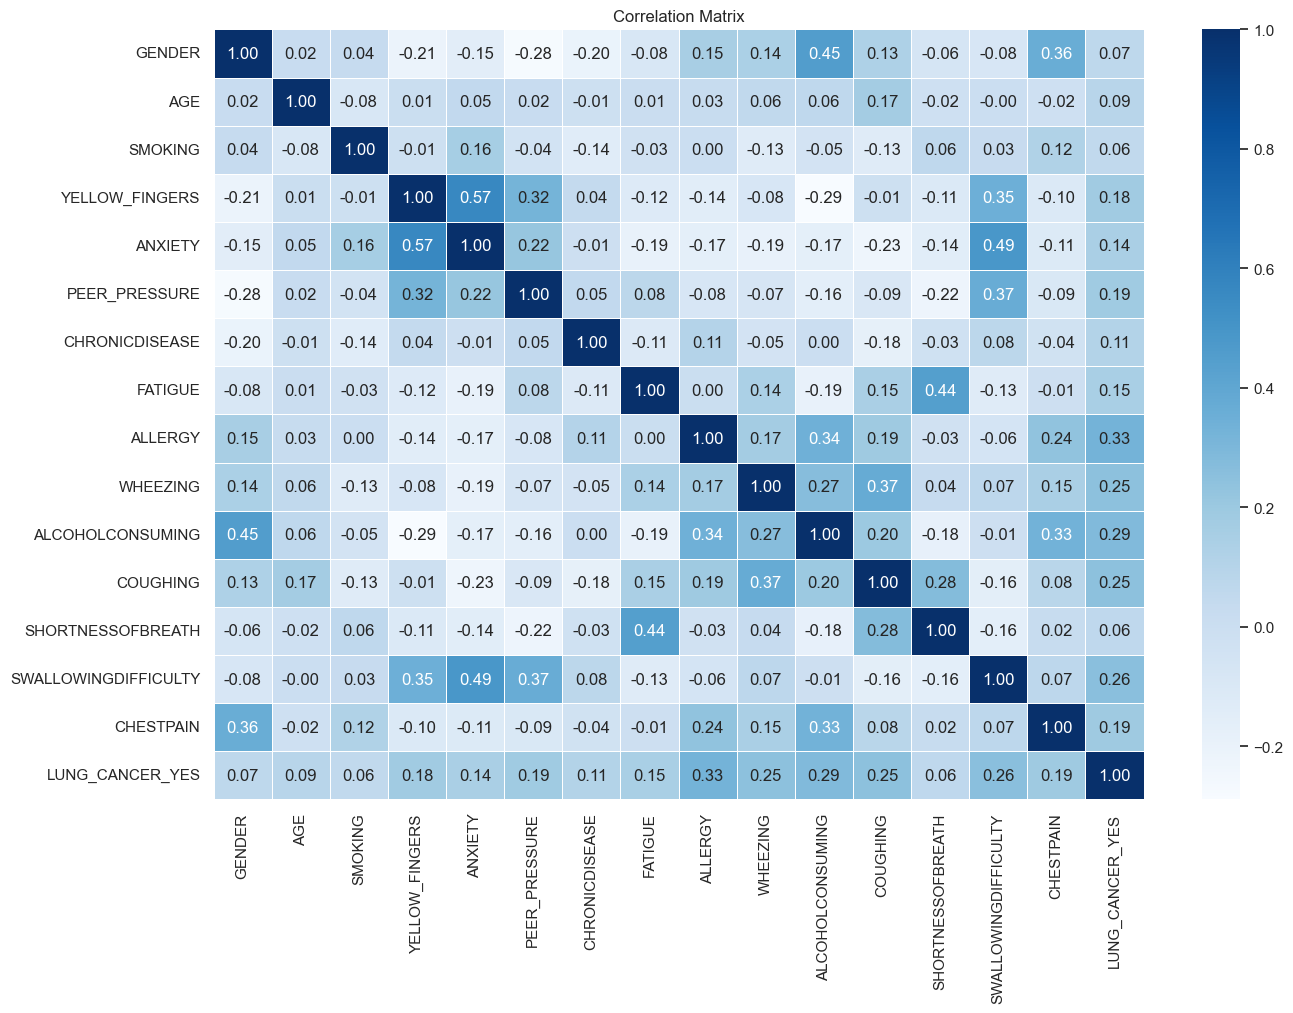

GENDER       AGE   SMOKING  YELLOW_FINGERS   ANXIETY  \
GENDER                1.000000  0.021306  0.036277       -0.212959 -0.152127   
AGE                   0.021306  1.000000 -0.084475        0.005205  0.053170   
SMOKING               0.036277 -0.084475  1.000000       -0.014585  0.160267   
YELLOW_FINGERS       -0.212959  0.005205 -0.014585        1.000000  0.565829   
ANXIETY              -0.152127  0.053170  0.160267        0.565829  1.000000   
PEER_PRESSURE        -0.275564  0.018685 -0.042822        0.323083  0.216841   
CHRONICDISEASE       -0.204606 -0.012642 -0.141522        0.041122 -0.009678   
FATIGUE              -0.083560  0.012614 -0.029575       -0.118058 -0.188538   
ALLERGY               0.154251  0.027990  0.001913       -0.144300 -0.165750   
WHEEZING              0.141207  0.055011 -0.129426       -0.078515 -0.191807   
ALCOHOLCONSUMING      0.454268  0.058985 -0.050623       -0.289025 -0.165750   
COUGHING              0.133303  0.169950 -0.129471       -0.012640 -0.225644   
SHORTNESSOFBREATH    -0.064911 -0.017513  0.061264       -0.105944 -0.144077   
SWALLOWINGDIFFICULTY -0.078161 -0.001270  0.030718        0.345904  0.489403   
CHESTPAIN             0.362958 -0.018104  0.120117       -0.104829 -0.113634   
LUNG_CANCER_YES       0.067254  0.089465  0.058179        0.181339  0.144947   

                      PEER_PRESSURE  CHRONICDISEASE   FATIGUE   ALLERGY  \
GENDER                    -0.275564       -0.204606 -0.083560  0.154251   
AGE                        0.018685       -0.012642  0.012614  0.027990   
SMOKING                   -0.042822       -0.141522 -0.029575  0.001913   
YELLOW_FINGERS             0.323083        0.041122 -0.118058 -0.144300   
ANXIETY                    0.216841       -0.009678 -0.188538 -0.165750   
PEER_PRESSURE              1.000000        0.048515  0.078148 -0.081800   
CHRONICDISEASE             0.048515        1.000000 -0.110529  0.106386   
FATIGUE                    0.078148       -0.110529  1.000000  0.003056   
ALLERGY                   -0.081800        0.106386  0.003056  1.000000   
WHEEZING                  -0.068771       -0.049967  0.141937  0.173867   
ALCOHOLCONSUMING          -0.159973        0.002150 -0.191377  0.344339   
COUGHING                  -0.089019       -0.175287  0.146856  0.189524   
SHORTNESSOFBREATH         -0.220175       -0.026459  0.441745 -0.030056   
SWALLOWINGDIFFICULTY       0.366590        0.075176 -0.132790 -0.061508   
CHESTPAIN                 -0.094828       -0.036938 -0.010832  0.239433   
LUNG_CANCER_YES            0.186388        0.110891  0.150673  0.327766   

                      WHEEZING  ALCOHOLCONSUMING  COUGHING  SHORTNESSOFBREATH  \
GENDER                0.141207          0.454268  0.133303          -0.064911   
AGE                   0.055011          0.058985  0.169950          -0.017513   
SMOKING              -0.129426         -0.050623 -0.129471           0.061264   
YELLOW_FINGERS       -0.078515         -0.289025 -0.012640          -0.105944   
ANXIETY              -0.191807         -0.165750 -0.225644          -0.144077   
PEER_PRESSURE        -0.068771         -0.159973 -0.089019          -0.220175   
CHRONICDISEASE       -0.049967          0.002150 -0.175287          -0.026459   
FATIGUE               0.141937         -0.191377  0.146856           0.441745   
ALLERGY               0.173867          0.344339  0.189524          -0.030056   
WHEEZING              1.000000          0.265659  0.374265           0.037834   
ALCOHOLCONSUMING      0.265659          1.000000  0.202720          -0.179416   
COUGHING              0.374265          0.202720  1.000000           0.277385   
SHORTNESSOFBREATH     0.037834         -0.179416  0.277385           1.000000   
SWALLOWINGDIFFICULTY  0.069027         -0.009294 -0.157586          -0.161015   
CHESTPAIN             0.147640          0.331226  0.083958           0.024256   
LUNG_CANCER_YES       0.249300          0.288533  0.248570           0.060738   

         

In [17]:
# Convert categorical variables into numeric form using pd.get_dummies (One-Hot Encoding)
df_encoded = pd.get_dummies(df, drop_first=True)

# Now, calculate the correlation matrix on the encoded DataFrame (df_encoded)
corr_matrix = df_encoded.corr()

# Plot the correlation matrix using Seaborn
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True,linewidths=0.5, fmt=".2f", cmap='Blues')
plt.title("Correlation Matrix")
plt.show()


df_encoded.corr()

In [18]:
X=df.drop(['LUNG_CANCER'],axis=1)
y=df['LUNG_CANCER']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
categorical_cols = [col for col in X.columns if X[col].dtype == 'O']  # Object columns
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]  # Numeric columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Create individual SVM classifiers
svm1 = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear', C=1))
])

svm2 = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf', C=1, gamma=0.1))
])

svm3 = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='poly', C=1, degree=2))
])

# Step 2: Hyperparameter tuning using GridSearchCV for SVM
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': [0.01, 0.1, 1],
    'classifier__kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC())
]), param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Get the best SVM model from hyperparameter tuning
best_svm = grid_search.best_estimator_

# Step 3: Create a VotingClassifier ensemble
ensemble = VotingClassifier(estimators=[
    ('svm1', svm1),
    ('svm2', svm2),
    ('svm3', svm3),
    ('best_svm', best_svm)
], voting='hard')  # You can choose 'hard' or 'soft' voting

# Train the ensemble model
ensemble.fit(X_train, y_train)

# Step 4: Make predictions and evaluate accuracy
y_pred = ensemble.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Ensemble Accuracy:", accuracy)


Ensemble Accuracy: 0.967741935483871
